In [1]:
from scipy.stats import uniform, alpha


def generate_pseudorandom_variables(values, probabilities, num):
    X = [] # the list of the pseudorandom generated values
    U = uniform.rvs(size=num)
    for u in U:
        position = 0
        probabilities_sum = probabilities[0]
        while u > probabilities_sum:
            position += 1
            probabilities_sum += probabilities[position]
        X.append(values[position])
    return X

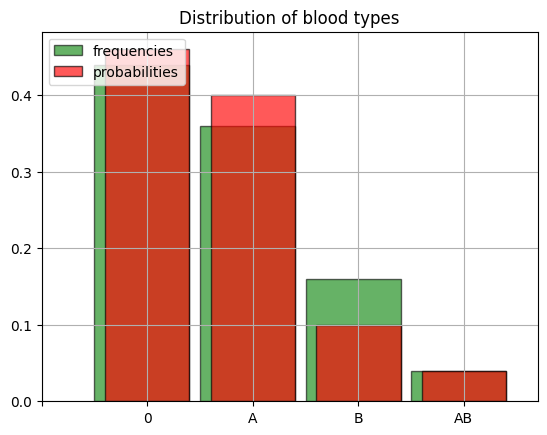

In [12]:
# generating N blood types based on stats
from matplotlib.pyplot import hist, bar, xticks, yticks, grid, show, legend, title

blood_types = ['0', 'A', 'B', 'AB']
blood_types_probabilities = [0.46, 0.4, 0.1, 0.04]
data = generate_pseudorandom_variables(blood_types, blood_types_probabilities, 100)
bin_edges = [k + 0.5 for k in range(-1, len(blood_types))]
hist(data, bin_edges, density=True, alpha= 0.6, color='green', edgecolor='black', width=0.9, label='frequencies')

distribution = dict([(blood_types[i], blood_types_probabilities[i]) for i in range(len(blood_types))])
bar(distribution.keys(), distribution.values(), alpha=0.65, color='red', edgecolor='black', width=0.8, label='probabilities')

xticks([x for x in range(-1, len(blood_types))])
title('Distribution of blood types')
legend(loc='upper left')
grid()
show()

In [15]:
from scipy.stats import uniform
from math import log

# functie repartitie exp => inversa F^-1 = -1/alpha * log(1 - u)
def generate_pseudorandom_variables_exp(alpha_, num):
    F_inv = lambda u: (-1/alpha_) * log(1 - u)
    U = uniform.rvs(size=num)
    X = [F_inv(u) for u in U]
    return X
    

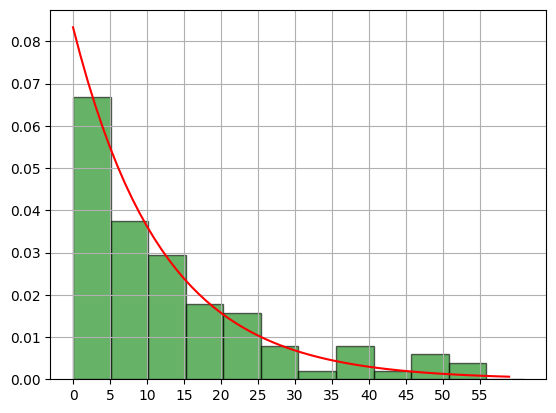

In [25]:
from matplotlib.pyplot import plot
from scipy.stats import expon

Alpha = 1/12
N = 100
data = generate_pseudorandom_variables_exp(Alpha, N)
hist(data, bins = 12, density=True, range = (0,61), alpha=0.6, color='green', edgecolor='black', label='frequencies')

x = range(60)
plot(x, expon.pdf(x, loc = 0, scale = 1/Alpha), 'r-')

xticks(range(0, 60, 5))
grid()
show()

In [26]:
def estimated_probability():
    samples = 1000
    X = generate_pseudorandom_variables_exp(Alpha, samples)
    return sum([x >= 5 for x in X])/samples

print(estimated_probability())

0.641


In [28]:
theoretical_probability = 1 - expon.cdf(5, loc = 0, scale = 12)
print(theoretical_probability)

0.6592406302004438
